# Laporan Project Machine learning - Candra Burhanudin
# Dataset : [Anime Recommendations Database](https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database?select=rating.csv)


## Data Understanding

> install paket kaggle (dataset berasal dari platform KAGGLE) & Import Library yang dibutuhkan


In [ ]:
!pip install kaggle

> membuat direktori .kaggle di dalam direktori beranda user /root/.kaggle lalu menyalin file kaggle.json ke direktori .kaggle

In [ ]:
! mkdir ~/.kaggle


In [ ]:
! cp kaggle.json ~/.kaggle/


> atur izin akses file kaggle.json menjadi 600 (hanya pemilik file yg memiliki izin read & write. pengguna lain tidak diizinkan) dan mulai proses unduh dataset menggunakan kaggle datasets download

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d CooperUnion/anime-recommendations-database

 68% 17.0M/25.0M [00:00<00:00, 80.6MB/s]
100% 25.0M/25.0M [00:00<00:00, 91.7MB/s]


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from zipfile import ZipFile
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

> ekstrak dataset menggunakan libbrary zipfile di direktori /content/ / lalu untuk membaca dataset format csv dilakukan dengan library pandas pd.read_csv(alamat file)

In [ ]:
zip_file_path = '/content/anime-recommendations-database.zip'
with ZipFile(zip_file_path, 'r') as zip_ref :
  zip_ref.extractall('/content/')

In [ ]:
df_anime = pd.read_csv('/content/anime.csv')
df_rating = pd.read_csv('/content/rating.csv')
print('jumlah data anime : ', len(df_anime.anime_id.unique()))
print('jumlah data penilaian yang diberikan pengguna : ',len(df_rating.rating))
print('jumlah user yang memberikan rating : ',len(df_rating.user_id.unique()))


jumlah data anime :  12294
jumlah data penilaian yang diberikan pengguna :  7813737
jumlah user yang memberikan rating :  73515


## Univariate Exploratory Data Analysis
Anime.csv
* anime_id - myanimelist.net's unique id identifying an anime.
name - full name of anime.
* genre - comma separated list of genres for this anime.
* type - movie, TV, OVA, etc.
episodes - how many episodes in this show. (1 if movie).
* rating - average rating out of 10 for this anime.
* members - number of community members that are in this anime's
"group".

Rating.csv

* user_id - non identifiable randomly generated user id.
* anime_id - the anime that this user has rated.
* rating - rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).
> pada proyek ini, kita akan mengeksplorasi beberapa variabel saja, antara lain: df_anime, df_rating.

### Data Anime

> memotong data hingga 10000 record

In [ ]:
df_anime = df_anime[:10000]

In [ ]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  10000 non-null  int64  
 1   name      10000 non-null  object 
 2   genre     9960 non-null   object 
 3   type      10000 non-null  object 
 4   episodes  10000 non-null  object 
 5   rating    9998 non-null   float64
 6   members   10000 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 547.0+ KB


In [ ]:
print('banyak data Anime : ',len(df_anime.anime_id.unique()))
print('jumlah genre Anime : ',len(df_anime.genre.unique()))

banyak data Anime :  10000
jumlah genre Anime :  3000


> Filter Data dengan membuang data yang tidak pantas digunakan

In [ ]:
df_anime_filtered = df_anime[~df_anime['genre'].apply(lambda x: isinstance(x, float) or 'Hentai' in x)]

In [ ]:
print('banyak data Anime setelah filtrasi : ',len(df_anime_filtered.anime_id.unique()))
print('jumlah genre Anime setelah filtrasi: ',len(df_anime_filtered.genre.unique()))
print('genre Anime setelah filtrasi: ',df_anime_filtered.genre.unique())

banyak data Anime setelah filtrasi :  9960
jumlah genre Anime setelah filtrasi:  2999
genre Anime setelah filtrasi:  ['Drama, Romance, School, Supernatural'
 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen'
 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen' ...
 'Action, Drama, Military, Seinen' 'Comedy, Kids, School'
 'Adventure, Fantasy, Kids, Magic, Martial Arts']


In [ ]:
df_anime_filtered

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
9995,22623,Pochacco no Ninjin Hata wa Oosawagi,"Fantasy, Kids",OVA,1,6.35,76
9996,22617,Pochacco no Wakuwaku Birthday,"Fantasy, Kids",OVA,1,6.00,74
9997,17613,Poka Poka Mori no Rascal,Kids,TV,52,5.22,93
9998,32621,Pokopon no Yukai na Saiyuuki,"Adventure, Fantasy, Kids, Magic, Martial Arts",Movie,1,5.57,35


### Data Anime User Rating

memotong data hingga 10000 record

In [ ]:
df_rating = df_rating[:10000]

In [ ]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   10000 non-null  int64
 1   anime_id  10000 non-null  int64
 2   rating    10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [ ]:
df_rating.sample(5)

,user_id,anime_id,rating
6800,76,877,10
724,5,23251,7
5955,54,28701,-1
5811,54,19151,-1
91,1,13411,-1


In [ ]:
print('banyak data User : ',len(df_rating.user_id.unique()))
print('banyak data Anime : ',len(df_rating.anime_id.unique()))

banyak data User :  123
banyak data Anime :  2402


In [ ]:
# Salin slice DataFrame ke DataFrame baru
df_rating_copy = df_rating.copy()

> menambahkan huruf pada `user_id` agar id lebih bersifat unik

In [ ]:
df_rating_copy.loc[:,'user_id'] = 'U' + df_rating_copy['user_id'].astype(str)

> karena jumlah banyak anime pada `df_rating` dan `df_anime_filtered` berbeda karena sudah melalui tahap filtered maka pada `df_rating` dilakukan penyesuaian agar jumlah anime sama sesuai dengan anime_id pada `df_anime_filtered`

> mengganti nilai rating yang invalid (nilai -1 diganti menjadi 0)

In [ ]:
df_rating_copy['rating'] = df_rating_copy['rating'].replace(-1, 0)

In [ ]:
df_rating_filtered = df_rating_copy[df_rating_copy['anime_id'].isin(df_anime_filtered['anime_id'])]
df_rating_filtered.sample(5)

,user_id,anime_id,rating
4245,U43,32083,5
5732,U54,14749,0
3360,U37,13851,6
29,U1,5667,0
2593,U24,11757,9


> Menselaraskan  anime_id pada `df_anime_filtered` dengan `df_rating_filtered` agar jumlahnya sama

In [ ]:
df_anime_filtered = df_anime_filtered[df_anime_filtered['anime_id'].isin(df_rating_filtered['anime_id'])]

In [ ]:
df_anime_filtered

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
7926,32467,Under the Dog: Anthea-chan,"Action, Comedy, Parody",ONA,1,4.62,2390
8016,22377,Wonder Momo,"Action, Game, Martial Arts, School",ONA,5,3.90,3218
8024,19315,Pupa,"Fantasy, Horror, Psychological",TV,12,3.82,83652
8056,413,Hametsu no Mars,"Horror, Sci-Fi",OVA,1,2.37,27557


In [ ]:
print('banyak data Anime setelah filtrasi di dataframe df_anime_filtered: ',len(df_anime_filtered.anime_id.unique()))

banyak data Anime setelah filtrasi di dataframe df_anime_filtered:  2355


In [ ]:
print('banyak data pengguna setelah filtrasi : ',len(df_rating_filtered.user_id.unique()))
print('banyak data Anime setelah filtrasi di dataframe df_rating_filtered : ',len(df_rating_filtered.anime_id.unique()))
print('rating yang diberikan oleh pengguna :' ,(df_rating_filtered.rating.unique()))

banyak data pengguna setelah filtrasi :  123
banyak data Anime setelah filtrasi di dataframe df_rating_filtered :  2355
rating yang diberikan oleh pengguna : [ 0 10  8  6  9  7  3  5  4  1  2]


In [ ]:
df_rating_filtered.sample(5)

,user_id,anime_id,rating
196,U3,10408,7
9373,U120,18153,8
2257,U19,10863,8
2462,U22,1571,0
2910,U29,12361,7


### Distribusi Data Anime Dan Data Rating User

In [ ]:
df_anime_filtered.describe()

,anime_id,rating,members
count,2355.000000,2355.000000,2.355000e+03
mean,11379.809766,7.373567,7.852022e+04
std,10080.878485,0.696964,1.030869e+05
min,1.000000,2.000000,3.930000e+02
25%,1841.000000,6.940000,1.863750e+04
50%,9135.000000,7.410000,4.361500e+04
75%,19178.000000,7.820000,9.443250e+04
max,34240.000000,9.370000,1.013917e+06


In [ ]:
df_rating_filtered.describe()

,anime_id,rating
count,9935.000000,9935.000000
mean,10583.164670,6.006341
std,8927.085229,3.596083
min,1.000000,0.000000
25%,2167.000000,3.000000
50%,9367.000000,7.000000
75%,16526.000000,9.000000
max,34240.000000,10.000000


## Data Preprocessing

> Menggabungkan data anime

In [ ]:
anime_all = np.concatenate((
    df_anime_filtered.anime_id.unique(),
    df_rating_filtered.anime_id.unique()
))

anime_all = np.sort(np.unique(anime_all))
print('jumlah seluruh data anime berdasarkan anime_id: ', len(anime_all))

jumlah seluruh data anime berdasarkan anime_id:  2355


In [ ]:
all_anime = pd.merge( df_rating_filtered, df_anime_filtered , on='anime_id')
all_anime.sample(10)

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
9730,U112,4551,8,Hakushaku to Yousei,"Adventure, Fantasy, Historical, Magic",TV,12,7.47,63915
7995,U54,6637,0,Higashi no Eden Movie II: Paradise Lost,"Action, Comedy, Drama, Mystery, Romance, Thriller",Movie,1,7.78,87062
5974,U7,28713,8,Isuca: Gokuraku,"Comedy, Ecchi, Romance, Seinen, Supernatural",OVA,1,6.36,9464
3625,U90,3503,0,Kanokon,"Comedy, Ecchi, Harem, Romance, School, Shounen...",TV,12,6.74,122288
8054,U109,3342,10,Mnemosyne: Mnemosyne no Musume-tachi,"Action, Horror, Sci-Fi, Shoujo Ai, Supernatural",TV,6,7.50,96092
8287,U38,16524,7,Suisei no Gargantia,"Action, Adventure, Mecha, Sci-Fi",TV,13,7.64,170754
5120,U120,7054,10,Kaichou wa Maid-sama!,"Comedy, Romance, School, Shoujo",TV,26,8.26,391628
8108,U26,18767,0,BlazBlue: Alter Memory,"Action, Fantasy",TV,12,6.27,52965
9114,U54,50,0,Aa! Megami-sama! (TV),"Comedy, Magic, Romance, Seinen, Supernatural",TV,24,7.45,96694
7932,U107,10321,9,Uta no☆Prince-sama♪ Maji Love 1000%,"Comedy, Harem, Music, Romance, School, Shoujo",TV,13,7.37,105723


> Cek Missing Value

In [ ]:
all_anime.isnull().sum()

user_id     0
anime_id    0
rating_x    0
name        0
genre       0
type        0
episodes    0
rating_y    0
members     0
dtype: int64

In [ ]:
preparation = all_anime
preparation.sort_values('anime_id')

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
6548,U103,1,8,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
6541,U51,1,10,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
6542,U54,1,0,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
6543,U55,1,8,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
6544,U68,1,8,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
...,...,...,...,...,...,...,...,...,...
7842,U17,33934,0,Trigger-chan,Action,ONA,1,6.51,5051
7845,U77,34240,6,Shelter,"Music, Sci-Fi",Music,1,8.38,71136
7844,U46,34240,10,Shelter,"Music, Sci-Fi",Music,1,8.38,71136
7843,U17,34240,8,Shelter,"Music, Sci-Fi",Music,1,8.38,71136


> data yang digunakan hanya menggunakan data unik untuk dimasukkan ke dalam proses pemodelan, oleh karena itu perlu menghapus data yang duplikat

In [ ]:
preparation = preparation.drop_duplicates('anime_id')
preparation

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,U1,20,0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
34,U1,24,0,School Rumble,"Comedy, Romance, School, Shounen",TV,26,8.06,178553
41,U1,79,0,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV,24,7.31,158772
45,U1,226,0,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511
84,U1,241,0,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,11,6.69,84395
...,...,...,...,...,...,...,...,...,...
9930,U123,31973,7,Mobile Suit Gundam Thunderbolt,"Action, Drama, Mecha, Military, Sci-Fi, Space",ONA,4,8.00,14419
9931,U123,32011,6,Hakuouki: Otogisoushi,"Fantasy, Historical, Josei, Samurai",TV,13,6.71,2791
9932,U123,32175,9,Shounen Maid,"Comedy, Shoujo, Slice of Life",TV,12,7.43,30363
9933,U123,32245,8,Kuromukuro,"Action, Mecha, Sci-Fi",TV,26,7.35,46323


> Konversi Data series menjadi list

In [ ]:
anime_id = preparation['anime_id'].tolist()
anime_name = preparation['name'].tolist()
anime_genre = preparation['genre'].tolist()
print(len(anime_id))
print(len(anime_name))
print(len(anime_genre))

2355
2355
2355


> membuat dictionary untuk menentukan pasangan key-value pada data anime_id, anime_name, anime_genre

In [ ]:
anime_new = pd.DataFrame({
    'id': anime_id,
    'anime_name': anime_name,
    'anime_genre': anime_genre
})
anime_new

,id,anime_name,anime_genre
0,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P..."
1,24,School Rumble,"Comedy, Romance, School, Shounen"
2,79,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R..."
3,226,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,..."
4,241,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School"
...,...,...,...
2350,31973,Mobile Suit Gundam Thunderbolt,"Action, Drama, Mecha, Military, Sci-Fi, Space"
2351,32011,Hakuouki: Otogisoushi,"Fantasy, Historical, Josei, Samurai"
2352,32175,Shounen Maid,"Comedy, Shoujo, Slice of Life"
2353,32245,Kuromukuro,"Action, Mecha, Sci-Fi"


## Data Preparation

### Encoding Fitur User_id

> mengubah user_id menjadi list tanpa nilai yang sama

In [ ]:
user_ids = df_rating_filtered['user_id'].unique().tolist()
print('list user_id ', user_ids)

list user_id  ['U1', 'U2', 'U3', 'U4', 'U5', 'U6', 'U7', 'U8', 'U9', 'U10', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U19', 'U20', 'U21', 'U22', 'U23', 'U24', 'U25', 'U26', 'U27', 'U28', 'U29', 'U30', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'U39', 'U40', 'U41', 'U42', 'U43', 'U44', 'U45', 'U46', 'U47', 'U48', 'U49', 'U50', 'U51', 'U52', 'U53', 'U54', 'U55', 'U56', 'U57', 'U58', 'U59', 'U60', 'U61', 'U62', 'U63', 'U64', 'U65', 'U66', 'U67', 'U68', 'U69', 'U70', 'U71', 'U72', 'U73', 'U74', 'U75', 'U76', 'U77', 'U78', 'U79', 'U80', 'U81', 'U82', 'U83', 'U84', 'U85', 'U86', 'U87', 'U88', 'U89', 'U90', 'U91', 'U92', 'U93', 'U94', 'U95', 'U96', 'U97', 'U98', 'U99', 'U100', 'U101', 'U102', 'U103', 'U104', 'U105', 'U106', 'U107', 'U108', 'U109', 'U110', 'U111', 'U112', 'U113', 'U114', 'U115', 'U116', 'U117', 'U118', 'U119', 'U120', 'U121', 'U122', 'U123']


 > melakukan encoding user_id & encoding angka ke user_id

In [ ]:

user_to_user_encoded = {x : i for i,x in enumerate(user_ids)}
print('encode user_id : ',user_to_user_encoded)

user_encoded_to_user = {i : x for i,x in enumerate(user_ids)}
print('encoded angka ke user_id',user_encoded_to_user)

encode user_id :  {'U1': 0, 'U2': 1, 'U3': 2, 'U4': 3, 'U5': 4, 'U6': 5, 'U7': 6, 'U8': 7, 'U9': 8, 'U10': 9, 'U11': 10, 'U12': 11, 'U13': 12, 'U14': 13, 'U15': 14, 'U16': 15, 'U17': 16, 'U18': 17, 'U19': 18, 'U20': 19, 'U21': 20, 'U22': 21, 'U23': 22, 'U24': 23, 'U25': 24, 'U26': 25, 'U27': 26, 'U28': 27, 'U29': 28, 'U30': 29, 'U31': 30, 'U32': 31, 'U33': 32, 'U34': 33, 'U35': 34, 'U36': 35, 'U37': 36, 'U38': 37, 'U39': 38, 'U40': 39, 'U41': 40, 'U42': 41, 'U43': 42, 'U44': 43, 'U45': 44, 'U46': 45, 'U47': 46, 'U48': 47, 'U49': 48, 'U50': 49, 'U51': 50, 'U52': 51, 'U53': 52, 'U54': 53, 'U55': 54, 'U56': 55, 'U57': 56, 'U58': 57, 'U59': 58, 'U60': 59, 'U61': 60, 'U62': 61, 'U63': 62, 'U64': 63, 'U65': 64, 'U66': 65, 'U67': 66, 'U68': 67, 'U69': 68, 'U70': 69, 'U71': 70, 'U72': 71, 'U73': 72, 'U74': 73, 'U75': 74, 'U76': 75, 'U77': 76, 'U78': 77, 'U79': 78, 'U80': 79, 'U81': 80, 'U82': 81, 'U83': 82, 'U84': 83, 'U85': 84, 'U86': 85, 'U87': 86, 'U88': 87, 'U89': 88, 'U90': 89, 'U91': 90,

### Encoding Fitur anime_id

> petakan user_id dan dan anime_id ke dataframe yang berkaitan


In [ ]:
anime_ids = df_rating_filtered['anime_id'].unique().tolist()
print(anime_ids)

[20, 24, 79, 226, 241, 355, 356, 442, 487, 846, 936, 1546, 1692, 1836, 2001, 2025, 2144, 2787, 2993, 3455, 4063, 4214, 4224, 4581, 4744, 4898, 4999, 5034, 5277, 5667, 5781, 5958, 6163, 6205, 6324, 6500, 6547, 6682, 6707, 6747, 6773, 6793, 7088, 7148, 7593, 7739, 7858, 8074, 8407, 8424, 8525, 8630, 8841, 9041, 9062, 9136, 9181, 9330, 9367, 9515, 9581, 9675, 9750, 9790, 9919, 10067, 10073, 10076, 10079, 10080, 10209, 10578, 10604, 10719, 10790, 10793, 10794, 10805, 10897, 11161, 11266, 11617, 11737, 11757, 11759, 11771, 12293, 12549, 12729, 13357, 13367, 13411, 13561, 13663, 13759, 14749, 14813, 14833, 14967, 15117, 15437, 15451, 15583, 15609, 16011, 16498, 16706, 17265, 17729, 18247, 18277, 18753, 18897, 19163, 19221, 19285, 19429, 19815, 20045, 20785, 20787, 21033, 21881, 22147, 22199, 22319, 22535, 22547, 22663, 22877, 23233, 23321, 23847, 24133, 24455, 24873, 25099, 25157, 25159, 25283, 25397, 26243, 27775, 27899, 28121, 28677, 29093, 29095, 30015, 30296, 30544, 31338, 31845, 12189, 

> melakukan proses encoding anime_id dan proses encoding angka ke anime_id

In [ ]:
anime_to_anime_encoded = {x: i for i, x in enumerate(anime_ids)}
print('encode anime_id : ',anime_to_anime_encoded)
anime_encoded_to_anime = {i: x for i, x in enumerate(anime_ids)}
print('encode angka ke anime_id : ',anime_encoded_to_anime)

encode anime_id :  {20: 0, 24: 1, 79: 2, 226: 3, 241: 4, 355: 5, 356: 6, 442: 7, 487: 8, 846: 9, 936: 10, 1546: 11, 1692: 12, 1836: 13, 2001: 14, 2025: 15, 2144: 16, 2787: 17, 2993: 18, 3455: 19, 4063: 20, 4214: 21, 4224: 22, 4581: 23, 4744: 24, 4898: 25, 4999: 26, 5034: 27, 5277: 28, 5667: 29, 5781: 30, 5958: 31, 6163: 32, 6205: 33, 6324: 34, 6500: 35, 6547: 36, 6682: 37, 6707: 38, 6747: 39, 6773: 40, 6793: 41, 7088: 42, 7148: 43, 7593: 44, 7739: 45, 7858: 46, 8074: 47, 8407: 48, 8424: 49, 8525: 50, 8630: 51, 8841: 52, 9041: 53, 9062: 54, 9136: 55, 9181: 56, 9330: 57, 9367: 58, 9515: 59, 9581: 60, 9675: 61, 9750: 62, 9790: 63, 9919: 64, 10067: 65, 10073: 66, 10076: 67, 10079: 68, 10080: 69, 10209: 70, 10578: 71, 10604: 72, 10719: 73, 10790: 74, 10793: 75, 10794: 76, 10805: 77, 10897: 78, 11161: 79, 11266: 80, 11617: 81, 11737: 82, 11757: 83, 11759: 84, 11771: 85, 12293: 86, 12549: 87, 12729: 88, 13357: 89, 13367: 90, 13411: 91, 13561: 92, 13663: 93, 13759: 94, 14749: 95, 14813: 96, 14

### Membuat fitur user & anime

> petakan user_id dan anime_id ke dataframe

In [ ]:
df_rating_filtered_copy = df_rating_filtered.copy()

In [ ]:
df_rating_filtered_copy['user']= df_rating_filtered_copy['user_id'].map(user_to_user_encoded)
df_rating_filtered_copy['anime']= df_rating_filtered_copy['anime_id'].map(anime_to_anime_encoded)

In [ ]:
df_rating_filtered_copy['user']

0         0
1         0
2         0
3         0
4         0
       ... 
9995    122
9996    122
9997    122
9998    122
9999    122
Name: user, Length: 9935, dtype: int64

In [ ]:
df_rating_filtered_copy.sample(5)

,user_id,anime_id,rating,user,anime
9090,U111,1689,9,110,173
5931,U54,26349,0,53,585
2890,U29,6918,8,28,1409
7385,U84,13469,7,83,1101
3282,U35,19383,0,34,1466


### Cek Misiing Value

> cek missing value pada dataframe rating

In [ ]:
df_rating_filtered_copy.isnull().sum()

user_id     0
anime_id    0
rating      0
user        0
anime       0
dtype: int64

In [ ]:
df_rating_filtered_copy.sample(10)

,user_id,anime_id,rating,user,anime
738,U5,24913,4,4,579
1775,U17,9117,0,16,984
2389,U21,15809,7,20,507
1169,U10,21881,9,9,122
8700,U108,57,8,107,271
7113,U80,813,10,79,163
8931,U109,7472,9,108,2105
5249,U54,273,0,53,1753
8808,U108,10408,10,107,192
9024,U110,11111,10,109,194


### Standarisasi Data

> cek beberapa hal dalam data seperti jumlah user, jumlah anime, kemudian mengubah nilai rating menjadi float

In [ ]:
num_users = len(user_to_user_encoded)
num_anime = len(anime_encoded_to_anime)
df_rating_filtered_copy['rating'] = df_rating_filtered_copy['rating'].values.astype(np.float32)
min_rating = min(df_rating_filtered['rating'])
max_rating = max(df_rating_filtered['rating'])
print('Number of User: {}, Number of Anime: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_anime, min_rating, max_rating
))

Number of User: 123, Number of Anime: 2355, Min Rating: 0, Max Rating: 10


### Split Data Train Val

> cek kembali dataset

In [ ]:
df_rating_filtered_copy.sample(frac=1, random_state=42)

,user_id,anime_id,rating,user,anime
9102,U111,8795,8.0,110,927
8568,U106,15051,7.0,105,1113
1596,U14,21431,6.0,13,558
3350,U37,11319,8.0,36,456
3875,U40,28881,7.0,39,1541
...,...,...,...,...,...
5757,U54,16067,0.0,53,508
5214,U54,170,0.0,53,156
5413,U54,2508,0.0,53,363
860,U7,2213,9.0,6,654


> membuat variabel x untuk mencocokan data user dan anime menjadi satu value


In [ ]:
x = df_rating_filtered_copy[['user','anime']].values
x

array([[   0,    0],
       [   0,    1],
       [   0,    2],
       ...,
       [ 122, 1273],
       [ 122, 2354],
       [ 122, 1324]])

> membuat variabel y untuk membuat rating dari hasil


In [ ]:
y =df_rating_filtered_copy['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values


In [ ]:
y

array([0. , 0. , 0. , ..., 0.4, 0.6, 0.8])

> membagi data menjadi 80% data training dan 20% data validasi


In [ ]:
train_indices = int(0.8 * df_rating_filtered_copy.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x,y)

[[   0    0]
 [   0    1]
 [   0    2]
 ...
 [ 122 1273]
 [ 122 2354]
 [ 122 1324]] [0.  0.  0.  ... 0.4 0.6 0.8]


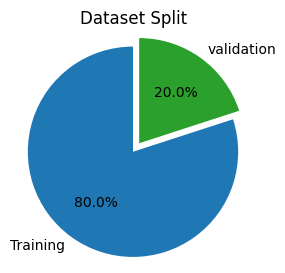

In [ ]:
%matplotlib inline
label= ['Training','validation']
colors=['tab:blue', 'tab:green']
myexplode = [0.1, 0]
fig1, ax1 = plt.subplots(figsize=(3, 3))
data= [int(len(x_train)),int(len(x_val))]
plt.pie(data, labels=label, autopct='%1.1f%%', startangle=90, colors=colors,explode = myexplode)
plt.title('Dataset Split')
ax1.axis('equal')
plt.show()

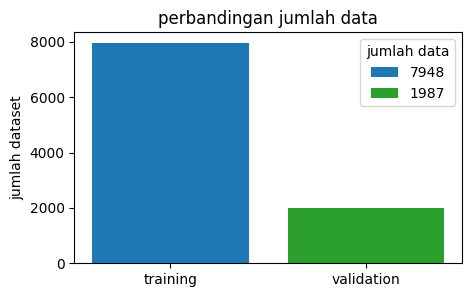

In [ ]:
%matplotlib inline
fig2,ax2 = plt.subplots(figsize=(5, 3))

datasplit = ['training', 'validation']
counts_dataset =  [len(x_train),len(x_val)]
bar_labels = [len(x_train),len(x_val)]
bar_colors = ['tab:blue','tab:green']

ax2.bar(datasplit, counts_dataset,label=bar_labels, color=bar_colors)
ax2.set_ylabel('jumlah dataset')
ax2.set_title('perbandingan jumlah data')
ax2.legend(title='jumlah data')
plt.show()

In [ ]:
df_rating_filtered_copy['rating'].value_counts().sort_index()

0.0     2204
1.0       92
2.0       93
3.0      108
4.0      149
5.0      367
6.0      678
7.0     1462
8.0     1899
9.0     1684
10.0    1199
Name: rating, dtype: int64

<Axes: xlabel='rating'>

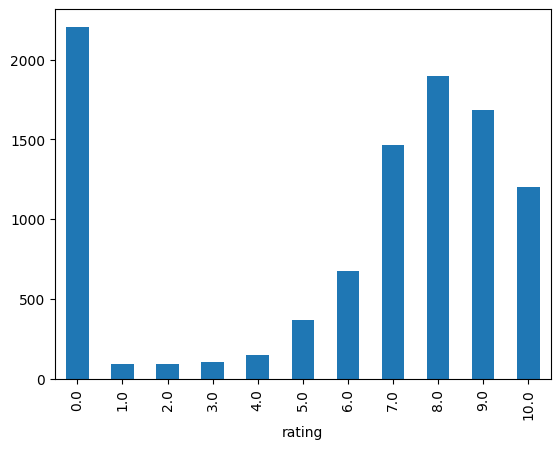

In [ ]:
df_rating_filtered_copy.groupby('rating').size().plot(kind='bar')

## Proses Training

model menghitung skor kecocokan antara pengguna dan data anime dengan teknik embedding
* Pertama, kita melakukan proses embedding terhadap data user dan data anime.
* Selanjutnya, lakukan operasi perkalian dot product antara embedding user dan data anime.
* kita juga dapat menambahkan bias untuk setiap user dan data anime.
* Skor kecocokan ditetapkan dalam skala [0,1] dengan fungsi aktivasi sigmoid.

In [ ]:
class RecommenderNet(tf.keras.Model):
  def __init__(self, num_users, num_anime, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_anime = num_anime
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.anime_embedding = layers.Embedding(
        num_anime,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.anime_bias = layers.Embedding(num_anime, 1)

  def call(self,inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    anime_vector = self.anime_embedding(inputs[:, 1])
    anime_bias = self.anime_bias(inputs[:, 1])

    dot_user_anime = tf.tensordot(user_vector, anime_vector, 2)
    x = dot_user_anime + user_bias + anime_bias

    return tf.nn.sigmoid(x)

> selanjutnya proses compile moded

In [80]:
model = RecommenderNet(num_users, num_anime, 50)
model.compile(
  loss = tf.keras.losses.BinaryCrossentropy(),
  optimizer = keras.optimizers.Adam(learning_rate=0.002),
  metrics=[tf.keras.metrics.RootMeanSquaredError()],
)

> Mulai Proses Training

In [81]:
history = model.fit(
    x = x_train,
    y = y_train,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
249/249 [==============================] - 1s 3ms/step - loss: 0.6533 - root_mean_squared_error: 0.3574 - val_loss: 0.6846 - val_root_mean_squared_error: 0.3203
Epoch 2/100
249/249 [==============================] - 1s 2ms/step - loss: 0.6150 - root_mean_squared_error: 0.3315 - val_loss: 0.6878 - val_root_mean_squared_error: 0.3228
Epoch 3/100
249/249 [==============================] - 1s 2ms/step - loss: 0.5772 - root_mean_squared_error: 0.3047 - val_loss: 0.6786 - val_root_mean_squared_error: 0.3156
Epoch 4/100
249/249 [==============================] - 1s 2ms/step - loss: 0.5234 - root_mean_squared_error: 0.2603 - val_loss: 0.6782 - val_root_mean_squared_error: 0.3153
Epoch 5/100
249/249 [==============================] - 1s 2ms/step - loss: 0.4984 - root_mean_squared_error: 0.2397 - val_loss: 0.6745 - val_root_mean_squared_error: 0.3124
Epoch 6/100
249/249 [==============================] - 1s 2ms/step - loss: 0.4804 - root_mean_squared_error: 0.2242 - val_loss: 0.6737 

In [82]:
evaluation = model.evaluate(x_val, y_val)


63/63 [==============================] - 0s 1ms/step - loss: 0.6933 - root_mean_squared_error: 0.3184


In [86]:
print("val_Loss :", evaluation[0])
print("Root Mean Squared Error :", evaluation[1])

val_Loss : 0.6933207511901855
Root Mean Squared Error : 0.31835827231407166


## Visualisasi Metrik

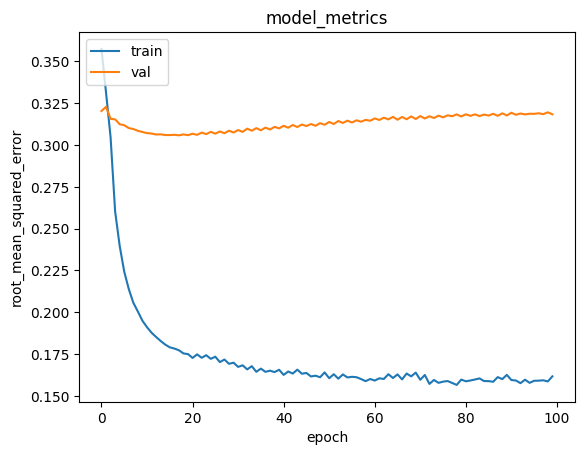

In [85]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc= 'upper left')
plt.show()

> mengambil sample user

In [98]:
anime_df = anime_new
df = df_rating_filtered
user_id = df.user_id.sample(1).iloc[0]
anime_visited_by_user = df[df.user_id == user_id]

anime_not_visited = anime_df[~anime_df['id'].isin(anime_visited_by_user.user_id.values)]['id']
anime_not_visited = list(
    set(anime_not_visited)
    .intersection(set(anime_to_anime_encoded.keys()))
)

anime_not_visited = [[anime_to_anime_encoded.get(x)] for x in anime_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_visited), anime_not_visited)
)

> Percobaan Model Prediksi

In [99]:
ratings = model.predict(user_anime_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_anime_ids = [
    anime_encoded_to_anime.get(anime_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Anime with high ratings from user')
print('----' * 8)

top_anime_user = (
    anime_visited_by_user.sort_values(
        by = 'rating',
        ascending = False
    )
    .head(5)
    .anime_id.values
)

anime_df_rows = anime_df[anime_df['id'].isin(top_anime_user)]
for row in anime_df_rows.itertuples():
    print(row.anime_name, ':', row.anime_genre)

print('----' * 8)
print('Top 10 Anime recommendation')
print('----' * 8)

recommended_anime = anime_df[anime_df['id'].isin(recommended_anime_ids)]
for row in recommended_anime.itertuples():
    print(row.anime_name, ':', row.anime_genre)

74/74 [==============================] - 0s 787us/step
Showing recommendations for users: U43
Anime with high ratings from user
--------------------------------
Tengen Toppa Gurren Lagann : Action, Adventure, Comedy, Mecha, Sci-Fi
Darker than Black: Kuro no Keiyakusha : Action, Mystery, Sci-Fi, Super Power
Steins;Gate : Sci-Fi, Thriller
Cowboy Bebop : Action, Adventure, Comedy, Drama, Sci-Fi, Space
Durarara!!x2 Ketsu : Action, Mystery, Supernatural
--------------------------------
Top 10 Anime recommendation
--------------------------------
Neon Genesis Evangelion: The End of Evangelion : Dementia, Drama, Mecha, Psychological, Sci-Fi
Rose of Versailles : Adventure, Drama, Historical, Romance, Shoujo
Interstella5555: The 5tory of The 5ecret 5tar 5ystem : Adventure, Drama, Music, Sci-Fi
Dragon Ball Z Special 1: Tatta Hitori no Saishuu Kessen : Adventure, Comedy, Fantasy, Sci-Fi, Shounen
Kimi ga Nozomu Eien : Drama, Romance, Slice of Life
Tokyo Majin Gakuen Kenpucho: Tou : Action, Drama, 